In [25]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import svm
import os
from keras.preprocessing import image
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Functions used for data pre-processing

In [26]:
def extract_features_labels(task_type):

    all_features = []
    all_labels = []
    
    image_paths = [os.path.join(images_dir, l) for l in os.listdir(images_dir)]
#     print(image_paths)   # ‘.\\assignment_dataset\\image\\IMAGE_0032.jpg'
    labels_file = open(os.path.join(basedir, labels_filename), 'r')

    lines_of_label = labels_file.readlines()
#     print(lines_of_label)   # 'IMAGE_0000.jpg,meningioma_tumor,\n'

    type_labels = {line.split(',')[0] : line.split(',')[1] for line in lines_of_label[1:]}
    
    if task_type == "Binary":
    
        # convert tumor names to int
        for k,v in type_labels.items():
            if v == "meningioma_tumor\n":
                type_labels[k] = 1
            elif v == 'glioma_tumor\n':
                type_labels[k] = 1
            elif v == 'pituitary_tumor\n':
                type_labels[k] = 1
            elif v == 'no_tumor\n':
                type_labels[k] = 0
                
    elif task_type == "Multiclass":
        for k,v in type_labels.items():
            if v == "meningioma_tumor\n":
                type_labels[k] = 1
            elif v == 'glioma_tumor\n':
                type_labels[k] = 2
            elif v == 'pituitary_tumor\n':
                type_labels[k] = 3
            elif v == 'no_tumor\n':
                type_labels[k] = 0

    
    for img in image_paths:
        # pic_features
        img_read = cv2.imread(img, flags = 0)  # 把图片转化成 numpy.ndarray，shape=(512, 512)
        img_read = cv2.pyrDown(img_read) 
        img_read = cv2.pyrDown(img_read) 
        all_features.append(img_read)   # list
        
        # tumor_labels
        file_name= img.split('\\')[-1]
        all_labels.append(type_labels[file_name])

    pic_features = np.array(all_features)
    tumor_labels = np.array(all_labels) 

    return pic_features, tumor_labels

def get_data(task_type):

    X,y = extract_features_labels(task_type)  

    # X: landmark_features - ndarray, shape = (134, 68, 2)
    # y: gender_labels - list, len= 134
    
    
    Y = np.array([y, -(y - 1)]).T   # Y: ndarray, shape = (134, 2)
    tr_X = X[:2500]
    tr_Y = Y[:2500]
    te_X = X[2500:]
    te_Y = Y[2500:]
    
    tr_X2 = tr_X.reshape((2500, 128*128))
    tr_Y2 = list(zip(*tr_Y))[0]
    te_X2 = te_X.reshape((500, 128*128))
    te_Y2 = list(zip(*te_Y))[0]

    return tr_X2, tr_Y2, te_X2, te_Y2

Task A - SVM：in this section, use SVM algorithm to train models for Binary task

In [27]:
basedir = '.\\assignment_dataset'
images_dir = os.path.join(basedir,'image')
labels_filename = 'label.csv'
# print(images_dir)   # .\assignment_dataset\image


def img_SVM(training_images, training_labels, test_images, test_labels):
    classifier = svm.SVC(kernel='linear')

    classifier.fit(training_images, training_labels)

    pred = classifier.predict(test_images)

    print()
    print('Prediction result:')
    print(pred)

    print("Vlidation accuracy:", accuracy_score(test_labels, pred))

    # Training accuracy
    training_pred = classifier.predict(tr_X[:200])
    training_accuracy = accuracy_score(training_labels[:200], training_pred)
    print("Trainingaccuracy:", training_accuracy)

    return pred


tr_X, tr_Y, te_X, te_Y= get_data(task_type = "Binary")
pred=img_SVM(tr_X, tr_Y, te_X, te_Y)
# 喂给机器的数据： 100个压缩成2维的array，长度为100的包含gender信息的元组，34个x_test，34个y_test            





Prediction result:
[1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 

Task A - SVM testing：using test dataset given to calculate accuracy

In [21]:
basedir = '.\\test'
images_dir = os.path.join(basedir,'image')
labels_filename = 'label.csv'

def get_testing_data(task_type):

    X,y = extract_features_labels(task_type)   
    # X: landmark_features - ndarray
    # y: gender_labels - list, len= 134
    
    
    Y = np.array([y, -(y - 1)]).T   # Y: ndarray, shape = (200, 2)

    testing_X = X.reshape((200, 128*128))
    testing_Y = list(zip(*Y))[0]

    return testing_X, testing_Y

def img_SVM_testing(training_images, training_labels, test_images, test_labels):
    classifier = svm.SVC(kernel='linear')

    classifier.fit(training_images, training_labels)

    pred_testing = classifier.predict(test_images)

    print(pred_testing)

    print("Test Accuracy:", accuracy_score(test_labels, pred_testing))
    return pred_testing


testing_X, testing_Y= get_testing_data(task_type="Binary")
pred_testing=img_SVM_testing(tr_X, tr_Y, testing_X, testing_Y)
# 喂给机器的数据： 100个压缩成2维的array，长度为100的包含gender信息的元组，34个x_test，34个y_test 

[1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1]
Test Accuracy: 0.915


Task A - knn：in this section, use KNN algorithm to train models for Binary task

In [28]:
k = 2
def KNNClassifier(tr_X, tr_Y, te_X,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)   
    neigh.fit(tr_X, tr_Y) # Fit KNN model
    Y_pred = neigh.predict(te_X)
    return Y_pred

tr_X, tr_Y, te_X, te_Y= get_data(task_type = "Binary")

Y_pred=KNNClassifier(tr_X, tr_Y, te_X,k)

score=metrics.accuracy_score(te_Y,Y_pred)
print(score)


0.922


Plot the relationship between k value and test accuracy for k values in range [0,20] using the matplotlib library.

In [29]:
score_list=[]


for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(tr_X,tr_Y)
    pred_i = knn.predict(te_X)
    score_list.append(metrics.accuracy_score(te_Y,pred_i)) 
print(score_list)    

[0.95, 0.922, 0.914, 0.906, 0.906, 0.892, 0.892, 0.896, 0.884, 0.884, 0.88, 0.892, 0.888, 0.886, 0.88, 0.886, 0.888, 0.884, 0.888, 0.884]


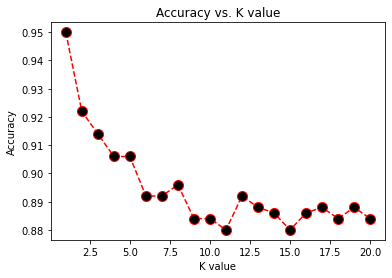

In [30]:
plt.plot(range(1,21),score_list,color='red', linestyle='dashed', marker='o', markerfacecolor='black',markersize=10)
plt.title("Accuracy vs. K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()